<a href="https://colab.research.google.com/github/yuu19/advanced_data_lecture/blob/main/Chap_5_Applied_Data_Science_20230526.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ver 1.0

About version：The version is 1.0 when released in the google classroom and it will be updated if there are any changes.

#5. <font color='crimson'>Classification, Data preprocessing and Evaluation </font>

**Today's highlight**：

- Classification

- Data preprocessing

- Model evaluation




## 5.1 <font color='crimson'>Classification</font>

In the previous lecture, you learned about regression analysis to predict quantitative objective variables such as "**sales**". In this lecture, you will learn about **classification problems** that predict qualitative objective variables such as "**pass**" or "**fail**", "**buy**" or "**not buy**".

<a name='section_decision_tree'></a>
###<font color="Crimson">logistic regression</font>

In the previous lecture, a regression model with **Sales** as the target variable

$$
Sales=\beta_0+\beta_1Temperature+\beta_2Weather+Error
$$

In a regression model, the objective variable, sales, is a real number and cannot predict a binary variable such as "will sell out" or "will not sell out. One way to extend the regression model to binary classification is through logistic regression analysis. With $y$ as a binary variable representing whether $y$ will sell out ($y=1$) or not ($y=0$), the logistic regression model is expressed as follows.

$$
P(y=1)=G(\beta_0+\beta_1 temperature+\beta_2 weather)
$$

where the left side represents the probability that $y=1$ (sell out). $G$ is a function that maps to a real number between 0 and 1,
It is defined by the following equation.

$$
G(x)=\frac{1}{1+e^{-x}}
$$

Since the left-hand side is probability, the use of a function that maps to a real number between 0 and 1 on the right-hand side is a feature of logistic regression analysis. In machine learning, it is called a sigmoid function (Sigmoid functoin) and will be used frequently in future lectures. Note that the left-hand side is a probability, not the binary variable itself. For example, $P(y=1)=0.9$ has a 90% probability that the objective variable will be 1 and a 10% probability that the objective variable will be 0. The relationship between probability and the objective variable is somewhat confusing, so we will next introduce the **Bernoulli distribution**.

Before that, let's graph $G(x)$ in Python to see the shape of the sigmoid function.

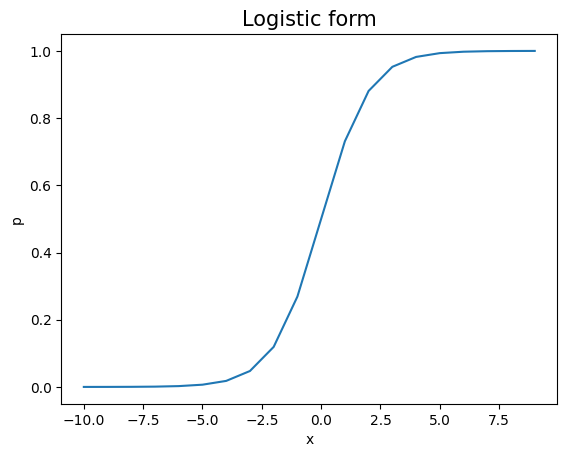

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def logistic(x):
  return 1/(1 + np.exp(-x) )

x = np.arange(-10, 10, 1) # from -10 to 10
y = logistic(x)

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('p')
plt.title('Logistic form', fontsize=15)
plt.show()


In the sigmoid function, $G(x)$ for any $x$ falls between 0 and 1. As $x$ approaches $-\infty$, $G(x)$ is closer to 0, and as $x$ approaches $+\infty$, it is closer to 1.

As in the previous lecture, scikit-learn can be used to train models and make predictions. Let's use a simulation data (generated by me) for the practice.

In [ ]:
# Simulation data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dgod1028/Research/main/data/AD_simu.csv')
display(df.head())


,age,Male,Use_PC,Married,Family_Num,Clicked_AD
0,25,1,0,0,4,0
1,31,1,0,0,2,0
2,32,0,0,0,2,0
3,28,1,0,0,2,0
4,29,1,0,0,1,0


### <font color='crimson'>**[Practice 1]Fit logistic regression** (15 mins)</font>

Assuming you want to predict whether the customer has clicked the AD (`Clicked_AD` is the target variable) using the demographic data.


1. Setting the `Clicked_AD` as target variable, and the others as independent variables.

1. Train the model using `sklearn` as shown below. The usage of classifier is almost the same as regression.

1. visualizing the coefficients for all the variables.

1. Predict whether the customer with demographic {`age`:15, `Male`:0, `Married`:1,,`Use_PC`:0, `Family_Num`:0} click the AD or not.

★ Challenge ★

5. Calculate the click probability for the customer above. (Google it!)




In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

# Start from here

# 1.

target = 'Clicked_AD'
y = df[target]
X = df.drop(target, axis=1)

display(X, y)

,age,Male,Use_PC,Married,Family_Num
0,25,1,0,0,4
1,31,1,0,0,2
2,32,0,0,0,2
3,28,1,0,0,2
4,29,1,0,0,1
...,...,...,...,...,...
9995,34,1,0,1,1
9996,33,1,0,1,4
9997,34,1,0,0,2
9998,38,0,0,0,1


0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: Clicked_AD, Length: 10000, dtype: int64

In [ ]:
# 2
logistic.fit(X, y)

LogisticRegression()

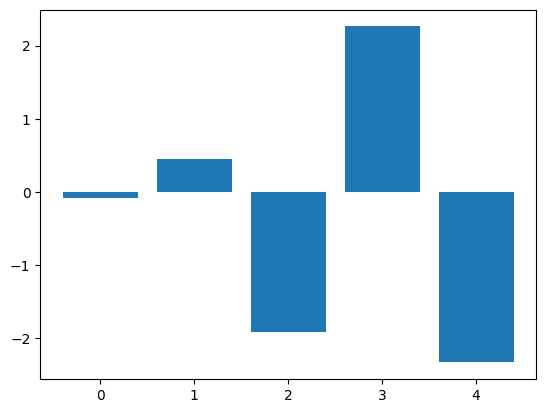

In [ ]:
# 3 Visualize the coef

coefs = logistic.coef_

import matplotlib.pyplot as plt
plt.bar([0,1,2,3,4], coefs[0])
plt.show()

In [ ]:
# 4
display(X)
newdf = pd.DataFrame([[15, 0, 0, 1, 0]], columns=X.columns)
newdf

,age,Male,Use_PC,Married,Family_Num
0,25,1,0,0,4
1,31,1,0,0,2
2,32,0,0,0,2
3,28,1,0,0,2
4,29,1,0,0,1
...,...,...,...,...,...
9995,34,1,0,1,1
9996,33,1,0,1,4
9997,34,1,0,0,2
9998,38,0,0,0,1


,age,Male,Use_PC,Married,Family_Num
0,15,0,0,1,0


In [ ]:
pred = logistic.predict(newdf)
pred

array([1])

In [ ]:
# challenge

logistic.predict_proba(newdf)


array([[0.30222388, 0.69777612]])


###<font color="Crimson">Decision Tree</font>

Let us introduce another well-known classifier, the decision tree. Unlike linear regression and logistic regression, decision trees classify explanatory variables one by one in a sequential manner, with the variables used for classification (branching) being called nodes and the classified groups being called leaves. A leaf is called a decision tree because it looks like a tree with leaves branching from the top by nodes. There are several types of decision trees, but in this lecture, we will discuss one of the most popular methods, **CART (Classification And Regression Trees)**.

　The features of decision trees will be explained by applying decision trees to data generated by simulation and looking at the analysis results.

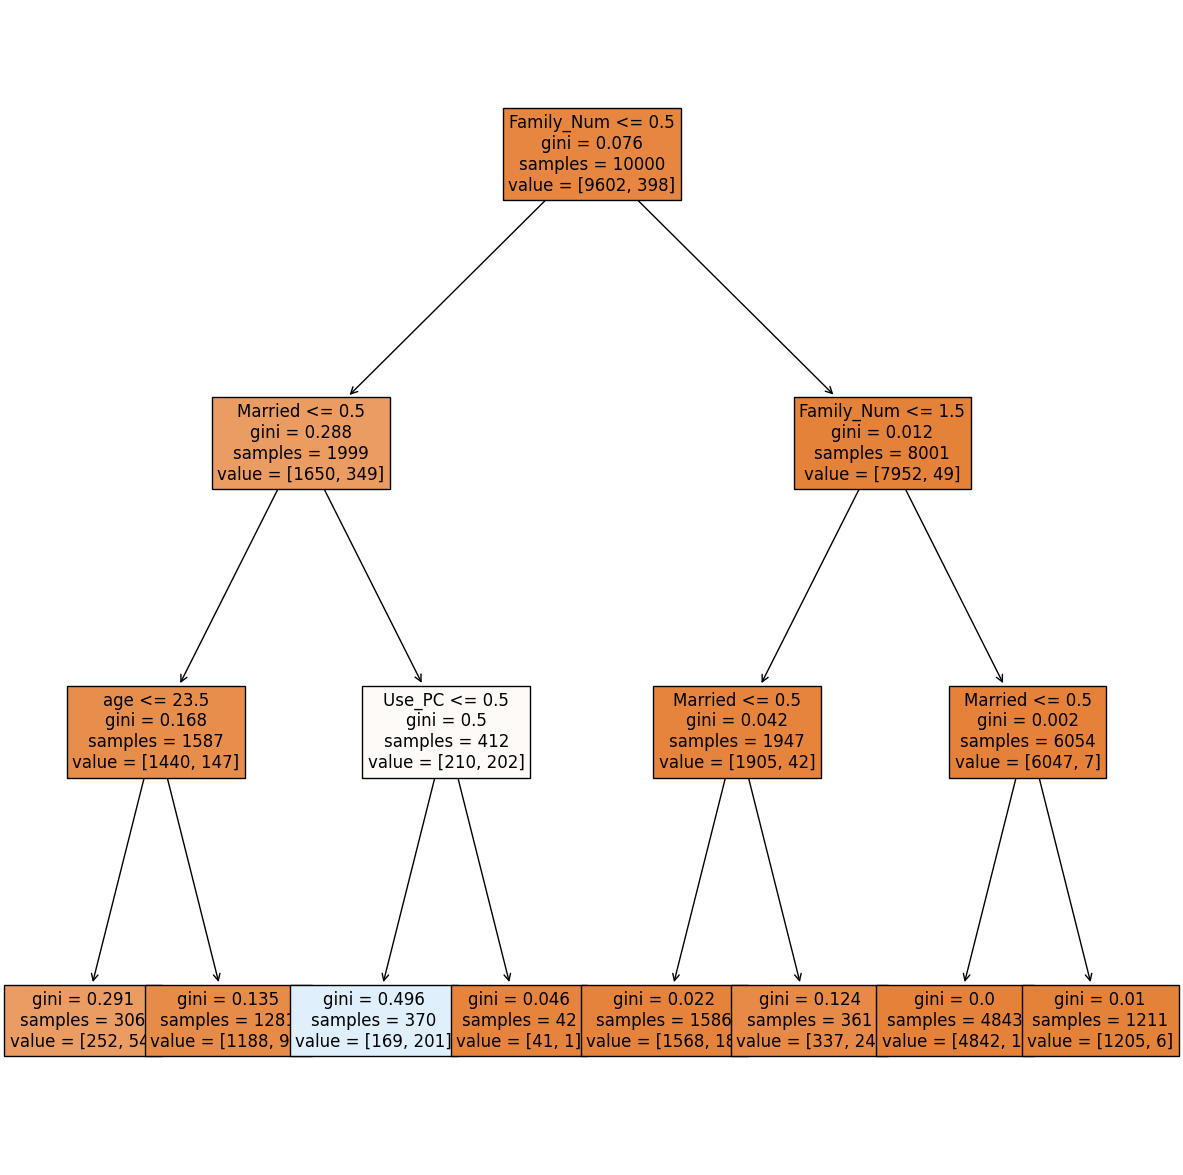

In [ ]:
# 1. Import module
from sklearn import tree

# 2. Define Decision tree
dtree = tree.DecisionTreeClassifier(max_depth=3) # max_depth define the depth of the tree
X = df.drop('Clicked_AD', axis=1)
y = df['Clicked_AD']


dtree.fit(X, y)

# Visualization

plt.figure(figsize=(15,15))

tree.plot_tree(dtree, feature_names=X.columns, fontsize=12, filled=True)
plt.show()

**Feature Importance**

In decision trees (also in the Random Forest), it is difficult to know which explanatory variables are important because there are no regression coefficients to deal with in linear or logistic regression. Instead, Variable Importance indicators are used to evaluate variables. Variable Importance is an indicator that expresses "how much the Gini impurity can be reduced by branching on the variable in question. The higher the Variable Importance, the greater the contribution of the variable to the classification.

In [ ]:
dtree.feature_importances_ # variable importance

array([0.02390349, 0.        , 0.09128359, 0.47216413, 0.41264878])

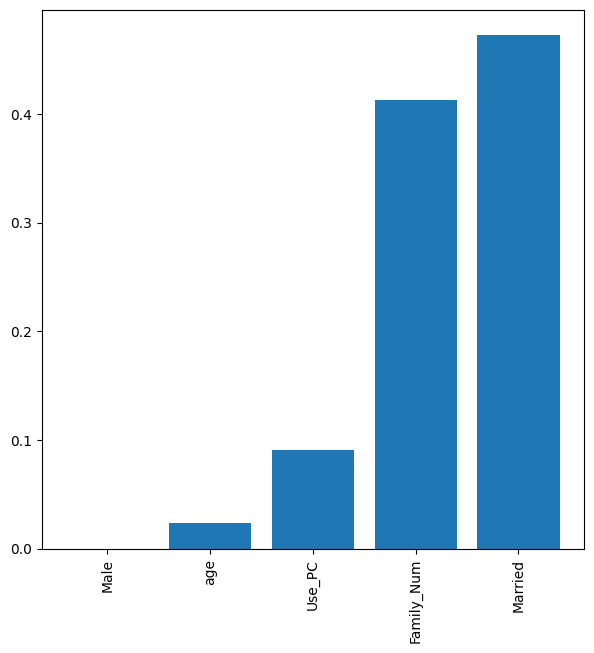

In [ ]:
importance = dtree.feature_importances_ # variable importance
labels = X.columns[np.argsort(importance)] #sort label
importance = np.sort(importance) #sort importance

plt.figure(figsize=(7, 7))
plt.bar(range(len(importance)), importance, tick_label =labels, align ="center")
plt.xticks(rotation='vertical')
plt.show()

## 5.2 <font color='crimson'>Data Preprocessing</font>

The regression analysis and classification problems we have done so far were easy, because the data we used was already nicely formatted.In fact, in most cases, data cannot be used for regression analysis as is in raw form (character data are included, missing values, etc.). Before regression analysis, it is necessary to format the data into a numeric matrix $X$ that can be used for regression through some preprocessing.

Preprocessing is one of the most difficult aspects of data analysis. Various preprocessing methods are possible depending on the purpose of the analysis. This exercise will introduce **dummy processing**, **division of training and test data**, and **normalization**.

Here is another simulation data for the practice.

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(1)
# Generate simulation data

col0 = np.random.normal(3, 1, 10) # N(3, 1)
col1 = np.random.binomial(1, 0.5, 10) # p(x=0.5)
col2 = np.random.binomial(1, 0.3, 10) # p(x=0.3)
col3 = np.random.randint(0, 4, 10) # 0, 1, 2, 3
col4 = np.random.randint(0, 3, 10) # 0, 1, 2

# To string data
col2n = 'Yes No'.split()
col3n = 'Tokyo Sendai Osaka Yamagata'.split()
col4n = 'Low Medium High'.split()


# col2, 3 , 4 as string data
col2 = [col2n[i] for i in col2]
col3 = [col3n[i] for i in col3]
col4 = [col4n[i] for i in col4]

df = pd.DataFrame([col0, col1, col2, col3, col4]).T # It will concat by rows, so transpose is needed.
df.columns = ['distance to school', 'gender', 'parttime?','hometown', 'academic_performance']
display(df)

,distance to school,gender,parttime?,hometown,academic_performance
0,4.624345,0,No,Tokyo,Medium
1,2.388244,1,No,Tokyo,High
2,2.471828,0,Yes,Sendai,Low
3,1.927031,1,Yes,Yamagata,Low
4,3.865408,0,Yes,Tokyo,Medium
5,0.698461,0,No,Osaka,High
6,4.744812,1,Yes,Tokyo,High
7,2.238793,1,Yes,Tokyo,Medium
8,3.319039,0,No,Sendai,Low
9,2.75063,1,Yes,Yamagata,High


This data, with character types, etc., cannot be used in regression or classification as is.

In this data,

- <font color='crimson'>**distance to school**</font>: **Continuous variable**. Usually can be used for data analysis without any processing.

- <font color='crimson'>**gender**</font>: In this example, this is a binary **dummy variable**. In this case, it is necessary to explain what the gender of the dummy variable (0 and 1) indicates. This is also usable without special handling, but it must be **0, 1**. So pairs such as 1, 2 or 2, 3 need to be changed to 0, 1.

- <font color='crimson'>**parttime?**</font>: This is also a binary **dummy variable**, but since it is a character type, it cannot be used as is, and like **gender**, it must be converted to a number, for example No = 0, Yes = 1, etc. before use.

- <font color='crimson'>**hometown**</font>: **Categorical variable**. Since this is not ordinal data, simply converting it to Osaka=0, Yamagata=1, Tokyo=2, etc. will not work correctly in the data analysis (complicating matters, using it as a continuous value will not cause an error), so it is necessary to convert them to dummy variables.

- <font color='crimson'>**academic_achievement**</font>: **Categorical** variable, but since it is an ordinal variable, the analysis will decide whether to convert it to a dummy variable like the **family home** variable, or to a continuous value of low=0, medium=1, high=2.

### <font color='crimson'>Create dummy variables</font>.

Now let's use the **hometown** variable as an example to fix the category variables to dummies.

In pandas, you can easily create dummy variables with `pd.get_dummies()`.

In [ ]:
tmp = df['hometown'].copy()
print('before convert')
display(tmp)
print('\nafter convert')
tmp2 = pd.get_dummies(tmp)
display(tmp2)

before convert


0       Tokyo
1       Tokyo
2      Sendai
3    Yamagata
4       Tokyo
5       Osaka
6       Tokyo
7       Tokyo
8      Sendai
9    Yamagata
Name: hometown, dtype: object


after convert


,Osaka,Sendai,Tokyo,Yamagata
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,0,1,0
5,1,0,0,0
6,0,0,1,0
7,0,0,1,0
8,0,1,0,0
9,0,0,0,1


It was divided properly, but as we learned in the lecture, converting P elements into P dummy variables will cause **multicollinearity** problems.

In this example, focusing on <font color='red'>index 6</font>, it is obvious that at Sendai=0, Osaka=0, and Yamagata=0, Tokyo=1, so one of the four items must be removed. In this case, if you are not particular about the base variable, you can use `pd.get_dummies(data, drop_first=True)` to automatically drop the first column.

In [ ]:
tmp3 = pd.get_dummies(tmp, drop_first=True)
display(tmp3)

,Sendai,Tokyo,Yamagata
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,0
6,0,1,0
7,0,1,0
8,1,0,0
9,0,0,1


- Manual removal

Of course, if you want to set your own criteria variables, you can pull them out with the `drop` we learned last time after generating them.

In [ ]:
def mydummy(data, base):
  tmp = pd.get_dummies(data) # Convert to dummies
  tmp = tmp.drop(base, axis=1) # drop one of the columns you want
  return tmp

display( mydummy(tmp, 'Tokyo') )
display( mydummy(tmp, 'Yamagata') )

,Osaka,Sendai,Yamagata
0,0,0,0
1,0,0,0
2,0,1,0
3,0,0,1
4,0,0,0
5,1,0,0
6,0,0,0
7,0,0,0
8,0,1,0
9,0,0,1


,Osaka,Sendai,Tokyo
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,0
4,0,0,1
5,1,0,0
6,0,0,1
7,0,0,1
8,0,1,0
9,0,0,0


- Converting multiple coumns

With `pd.get_dummies()` you can convert multiple columns at the same time.

In [ ]:
display(df)

newdf = pd.get_dummies(df, columns='parttime? hometown academic_performance'.split(), drop_first=True)
display(newdf)

,distance to school,gender,parttime?,hometown,academic_performance
0,4.624345,0,No,Tokyo,Medium
1,2.388244,1,No,Tokyo,High
2,2.471828,0,Yes,Sendai,Low
3,1.927031,1,Yes,Yamagata,Low
4,3.865408,0,Yes,Tokyo,Medium
5,0.698461,0,No,Osaka,High
6,4.744812,1,Yes,Tokyo,High
7,2.238793,1,Yes,Tokyo,Medium
8,3.319039,0,No,Sendai,Low
9,2.75063,1,Yes,Yamagata,High


,distance to school,gender,parttime?_Yes,hometown_Sendai,hometown_Tokyo,hometown_Yamagata,academic_performance_Low,academic_performance_Medium
0,4.624345,0,0,0,1,0,0,1
1,2.388244,1,0,0,1,0,0,0
2,2.471828,0,1,1,0,0,1,0
3,1.927031,1,1,0,0,1,1,0
4,3.865408,0,1,0,1,0,0,1
5,0.698461,0,0,0,0,0,0,0
6,4.744812,1,1,0,1,0,0,0
7,2.238793,1,1,0,1,0,0,1
8,3.319039,0,0,1,0,0,1,0
9,2.75063,1,1,0,0,1,0,0


### <font color='crimson'>**[Practice 2]Data preprocessing** (10 mins)</font>

Rectify the categorical variables in the data frame in the example above to dummy variables.

1. Please preprocessing the data above that can be directly used in machine learning models.

1. Convert the **Academic_performance** variable to a continuous value. In doing so, set low=0, medium=1, high=2.



In [ ]:
import pandas as pd
df2 = df.copy()
display(df2)
# Use the df2

newdf = pd.get_dummies(df2, columns='parttime? hometown'.split(), drop_first=True)
display(newdf)

performs = []

for i in newdf['academic_performance']:
  if i == 'High':
    s = 2
  elif i == 'Medium':
    s = 1
  else:
    s = 0
  performs.append(s)

newdf['academic_performance'] = performs
display(newdf)

,distance to school,gender,parttime?,hometown,academic_performance
0,4.624345,0,No,Tokyo,Medium
1,2.388244,1,No,Tokyo,High
2,2.471828,0,Yes,Sendai,Low
3,1.927031,1,Yes,Yamagata,Low
4,3.865408,0,Yes,Tokyo,Medium
5,0.698461,0,No,Osaka,High
6,4.744812,1,Yes,Tokyo,High
7,2.238793,1,Yes,Tokyo,Medium
8,3.319039,0,No,Sendai,Low
9,2.75063,1,Yes,Yamagata,High


,distance to school,gender,academic_performance,parttime?_Yes,hometown_Sendai,hometown_Tokyo,hometown_Yamagata
0,4.624345,0,Medium,0,0,1,0
1,2.388244,1,High,0,0,1,0
2,2.471828,0,Low,1,1,0,0
3,1.927031,1,Low,1,0,0,1
4,3.865408,0,Medium,1,0,1,0
5,0.698461,0,High,0,0,0,0
6,4.744812,1,High,1,0,1,0
7,2.238793,1,Medium,1,0,1,0
8,3.319039,0,Low,0,1,0,0
9,2.75063,1,High,1,0,0,1


,distance to school,gender,academic_performance,parttime?_Yes,hometown_Sendai,hometown_Tokyo,hometown_Yamagata
0,4.624345,0,1,0,0,1,0
1,2.388244,1,2,0,0,1,0
2,2.471828,0,0,1,1,0,0
3,1.927031,1,0,1,0,0,1
4,3.865408,0,1,1,0,1,0
5,0.698461,0,2,0,0,0,0
6,4.744812,1,2,1,0,1,0
7,2.238793,1,1,1,0,1,0
8,3.319039,0,0,0,1,0,0
9,2.75063,1,2,1,0,0,1


### <font color='crimson'>Training, Test data</font>

Knowing the training, test data is extremely important in data science.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=11P2Jt4AL61JzBvp5gbnnP70Mk8wc2pYE" width="90%">

**Figure. Training data and Test data**
</div>

Suppose you have a collection of four addition problems at hand. If all the problems in the book are used for learning, we will have no choice but to evaluate only the problems that we have already solved before, even when checking whether we have studied them properly (see figure on the left). As is true in the case of humans, if the test questions are based on problems that the learner has solved before, **is the learner really understanding addition?** is not known.

In comparison, by properly separating study and test data in advance, the evaluation phase can assess **whether the learner understands addition patterns** by checking whether he/she can solve **1+4**, a problem that he/she has never done at all and that is independent of the training data (see figure on the right). Just as practice problems learned in class are never tested as-is, machine learning can evaluate learning results more objectively by providing independent test data that has not been used in training at all.

<font size=10>In summary, </font>

<font size=10>Train the model with Training dataset.</font>

<font size=10>Evaluate the model with Test dataset.</font>


In python, you can easily separate training and test data using the `sklearn` module. In doing so, the data is shuffled and split randomly.

In [ ]:
from sklearn.model_selection import train_test_split # Import the module

X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)

where

- <font color='crimson'>**df**</font>: your data

- <font color='crimson'>**test_size**</font>:  Specify how many percentages are to be divided as test data.

- <font color='crimson'>**random_state**</font>: As with `np.random.seed(), it is possible to FIX random numbers.

In [ ]:
X_train

,distance to school,gender,parttime?,hometown,academic_performance
4,3.865408,0,Yes,Tokyo,Medium
9,2.75063,1,Yes,Yamagata,High
1,2.388244,1,No,Tokyo,High
6,4.744812,1,Yes,Tokyo,High
7,2.238793,1,Yes,Tokyo,Medium
3,1.927031,1,Yes,Yamagata,Low
0,4.624345,0,No,Tokyo,Medium
5,0.698461,0,No,Osaka,High


In [ ]:
X_test

,distance to school,gender,parttime?,hometown,academic_performance
2,2.471828,0,Yes,Sendai,Low
8,3.319039,0,No,Sendai,Low


- How do I divide by X, Y?

If you input not only X but also y as input, the output will be in the form `[X for training, X for testing, y for training, y for testing]`.

In [ ]:
# For example
target = 'academic_performance'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
display(X_train, y_train)

,distance to school,gender,parttime?,hometown
4,3.865408,0,Yes,Tokyo
9,2.75063,1,Yes,Yamagata
1,2.388244,1,No,Tokyo
6,4.744812,1,Yes,Tokyo
7,2.238793,1,Yes,Tokyo
3,1.927031,1,Yes,Yamagata
0,4.624345,0,No,Tokyo
5,0.698461,0,No,Osaka


4    Medium
9      High
1      High
6      High
7    Medium
3       Low
0    Medium
5      High
Name: academic_performance, dtype: object

In [ ]:
display(X_test, y_test)

,distance to school,gender,parttime?,hometown
2,2.471828,0,Yes,Sendai
8,3.319039,0,No,Sendai


2    Low
8    Low
Name: academic_performance, dtype: object

## 5.3 <font color='crimson'>Model Evaluation</font>

Since I only touched on regression analysis and regression coefficients in the last issue, I will now introduce forecasting and model evaluation.

I will explain using the TV data used in the last issue.

In [ ]:
import pandas as pd

# Set first column as index
df = pd.read_csv('https://raw.githubusercontent.com/dgod1028/Research/main/data/tvmarketing.csv')
display(df)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


First, split the data to training, test data.

In [ ]:
# 1. Divide to X, y
target = 'Sales'
X = df.drop(target, axis=1)
y = df[target]

from sklearn.model_selection import train_test_split # モジュールを読み込む

# Split to Training, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


Train the model with Training data.


In [ ]:
from sklearn.linear_model import LinearRegression # Import Linear regression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Next, let's make prediction using the test dataset.

In [ ]:
preds = linear.predict(X_test)
preds

array([16.84129141,  7.56876758, 17.194749  , 20.18766263, 17.10294183,
       13.93100422, 15.8176415 , 16.29962912, 17.12130326,  7.95894804,
       20.46767449, 10.20363326,  7.94517696, 17.29114652, 17.70427877,
       11.88370441, 18.89318158,  7.41728575, 18.26430249, 16.57964098,
       15.79009935,  7.20153891, 19.16401272, 12.25093308, 20.03159044,
        8.03239377,  8.34453814,  9.21211586, 18.18167604,  8.06911664,
       13.21490833, 17.6354234 ,  8.43175495,  8.48224889, 20.51357807,
       19.8709279 , 10.85087379, 20.21979514, 11.28695783, 17.37836333])

### <font color="Crimson">Evaluation for the Rgression</font>

After the models have been trained, a **model evaluation** is required, such as **how usable the model is**. Model evaluation is performed on training or test data by comparing the model estimate $\hat{y}$ with the true value $y$.

There are many different evaluation methods, but here are a few that are commonly used in regression problems.
<br><br>





- **Mean Absolute Error (MAE)**

  MAE is the average of the absolute difference between the observed and predicted values; the smaller the MAE, the more accurate the prediction. The formula is

<br>
\begin{eqnarray}
\boldsymbol{MAE} &= \frac{1}{N} \sum_{i=1}^{N}|y_i - \hat{y}_i|
\end{eqnarray}


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, preds)
print(mae)

- **Root Mean Square Error(RMSE)**

The square of the difference between the actual and predicted value is averaged and then square-rooted into an index. The formula is

<br>
\begin{eqnarray}
\boldsymbol{RMSE} &= \sqrt{\frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2}
\end{eqnarray}


The difference with **MAE** is in the sensitivity to residuals. For example, when there are two data sets and the residuals are ${\hat{u}_1}=100$ and ${\hat{u}_2}=200$, MAE is $\frac{100+200}{2}=150$ and RMSE is $\sqrt{ \frac {100^2 + 200^2} {2} }=158.114$ and the latter evaluates the loss to a greater extent than the former.


In [ ]:
# sklearn only has MSE, so we need to take root for MSE manually.
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(rmse)

3.8128352520531297


### <font color="Crimson">Evaluation for the Classfication</font>









Consider a problem in a classification problem. Suppose there are two classifiers that determine whether a customer purchases a product or not, as shown in the figure.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=11PgdMhadQHy8Qq4g5ffi-acWOVAP2ibr" width="40%">

**Which is useful?**
</div>

We will learn how to evaluate classification problems while thinking about the answers.

<br><br>
#### <font color="crimson">Confusion Matrix</font>
**Confusion Matrix** is explained in this section. In classification problems, predictions are either "hit" or "miss," but can be further subdivided as shown in the figure.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=11Yd2EDr12KeSRU_iGV0n93Fqd4uQWJp0" width="60%">

**Confusion matrix**
</div>

This matrix is called the **confusion matrix**, where the diagonal elements (**TP** and **TN**) are the correct classification and the others (**FP** and **FN**) are the wrong classification. There are two types of "hits (TP, TN)" and "misses (FP, FN)" in the forecast, respectively.

- **Accuracy**

　In general, **Accuracy** is defined as
<br><br>
$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$
<br>


> Is the percentage of correct answers on test data sufficient to evaluate a classifier?

<div align="center">
<img src="https://drive.google.com/uc?export=view&id=11XVe9rhd9XBl0ekhmesbwLa0oEd_A5be" width="60%">

**Confusion matrix**
</div>


Similar cases include "prediction of clicks on online advertisements," "prediction of rare chronic diseases," etc., where the distribution of the objective variable is overwhelmingly small and the advantage of a prediction being "right" (TP) greatly exceeds the disadvantage of a prediction being "wrong" (FP). In such cases, it is not reasonable to evaluate the performance of a classifier by the "percentage correct.

Various other evaluation metrics have been proposed as solutions, but this lecture will introduce **Precision (Precision)**, **Recall (Recall)**, and **F1 score (F1 score)**.

<br><br>
- **Precision**

<br><br>
$$
Precision = \frac{TP}{TP+FP}
$$
<br>
Precision focuses only on **TP** and **FP**, which is the ratio of "hits" to actual "hits" in the predicted sample. Precision is a relatively **conservative** measure for a classifier.

- **Recall**

<br><br>
$$
Recall = \frac{TP}{TP+FN}
$$
<br>
　Unlike accuracy, recall is an indicator that focuses on the ratio of true "hits" classified as "hits," and this indicator is useful when you can tolerate some "misses" and do not want to miss a "hit.

- **F1 score**

<br><br>
$$
F1 = 2 * \frac{Precision * Recall}{Precision + Recall}
$$
<br>

The F1 score is an index composed of the **harmonic mean** of precision and recall. Characteristically, F1 score has lower values when precision or recall is close to zero.

　Although we have introduced several indicators above, there is no absolute indicator. It is important to select an appropriate evaluation index according to the purpose of the analysis.

　The confusion matrix and the above indicators can be easily used with **scikit-learn**.

### <font color='crimson'>**[Practice 3]Model Evaluation** (remained time)</font>

Use the simulation data to evaluate the models.

1. Split the data and keep 30% of the data for test.

1. Fit to a classification model you like, and output the confusion matrix using test data.

1. Evaluate the model by using accuracy, precision, recall and f1 score.

1. Try at least 2 models and compare which performs best in test data.

★ Challenge ★

4. Try RandomForest, another powerful classification method.


**HINT**

You can calculate all the metrics using the modules below.

```python
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
```


In [ ]:
# Use the simulation data
from sklearn.model_selection import train_test_split # Import the module

# Simulation data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dgod1028/Research/main/data/AD_simu.csv')
#display(df.head())

# Start from here

target = 'Clicked_AD'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)
display(X_train)

,age,Male,Use_PC,Married,Family_Num
2572,26,1,0,0,4
4540,31,0,0,0,0
8384,22,1,0,0,4
3149,38,1,0,0,4
5479,27,1,0,0,4
...,...,...,...,...,...
8409,34,0,1,0,3
7583,29,0,0,0,0
8417,24,1,0,0,0
5832,39,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

logistic = LogisticRegression()
from sklearn import tree

# 2. Define Decision tree
dtree = tree.DecisionTreeClassifier(max_depth=3)

def my_evaluation(X_train, y_train,X_test,y_test, model):
  # Fit
  model.fit(X_train, y_train)

  # Predict
  preds = model.predict(X_test)

  # Confusion
  con = confusion_matrix(y_test, preds)
  print(con)

  accuracy = accuracy_score(y_test, preds)

  precision = precision_score(y_test, preds)

  recall = recall_score(y_test, preds)

  f1 = f1_score(y_test, preds)

  print('Accuracy:%.3f' % accuracy)
  print('Precision:%.3f' % precision)
  print('Rcall:%.3f' % recall)
  print('F1:%.3F' % f1)

print('Logistic')
my_evaluation(X_train, y_train, X_test, y_test, logistic)

print('Decision tree')
my_evaluation(X_t rain, y_train, X_test, y_test, dtree)

Logistic
[[2862   16]
 [  84   38]]
Accuracy:0.967
Precision:0.704
Rcall:0.311
F1:0.432
Decision tree
[[2828   50]
 [  54   68]]
Accuracy:0.965
Precision:0.576
Rcall:0.557
F1:0.567


## <font color='crimson'>Supplementary </font>



### <font color='crimson'>Data normalization</font>

Next, we will discuss data normalization.

There are many ways to standardize data, but for this exercise we will use normalization such that the data has a mean of 0 and a variance of 1.

> Why normalization?

Usually column units in data analysis are not aligned, which makes it impossible to compare partial regression coefficients, for example, between variables. For example, in the case of $$\hat{sales} = 0.3 * Promotion + 0.7 * temperature$$, we cannot say that the temperature has a stronger influence than Promotion because the units (yen for Promotion and degrees for temperature) are different.

By standardizing the data, it is possible to find variables that are relatively more influential.

Also, for optimization reasons (especially in deep learning, etc.), aligning scales can improve model training efficiency, etc.

> When to use normalization?

- Data normalization is recommended when you need to compare variables, for example when using **Lasso regression**.

- Otherwise, if you are not particular about the interpretation of the partial regression coefficients, you can analyze the data after basic normalization.

In python, normalization is easily performed with the `StandardScaler` in the `sklearn.preprocessing` module.


In [ ]:
from sklearn.preprocessing import StandardScaler

display(newdf) # use the preprocessed data
normdf = newdf.copy()
norm = StandardScaler() # define
normdf[newdf.columns] = norm.fit_transform(newdf) # fit normalization
display(normdf)

,distance to school,gender,parttime?_Yes,hometown_Sendai,hometown_Tokyo,hometown_Yamagata,academic_performance_Low,academic_performance_Medium
0,4.624345,0,0,0,1,0,0,1
1,2.388244,1,0,0,1,0,0,0
2,2.471828,0,1,1,0,0,1,0
3,1.927031,1,1,0,0,1,1,0
4,3.865408,0,1,0,1,0,0,1
5,0.698461,0,0,0,0,0,0,0
6,4.744812,1,1,0,1,0,0,0
7,2.238793,1,1,0,1,0,0,1
8,3.319039,0,0,1,0,0,1,0
9,2.75063,1,1,0,0,1,0,0


,distance to school,gender,parttime?_Yes,hometown_Sendai,hometown_Tokyo,hometown_Yamagata,academic_performance_Low,academic_performance_Medium
0,1.445536,-1.0,-1.224745,-0.5,1.0,-0.5,-0.654654,1.527525
1,-0.432124,1.0,-1.224745,-0.5,1.0,-0.5,-0.654654,-0.654654
2,-0.361938,-1.0,0.816497,2.0,-1.0,-0.5,1.527525,-0.654654
3,-0.819405,1.0,0.816497,-0.5,-1.0,2.0,1.527525,-0.654654
4,0.808254,-1.0,0.816497,-0.5,1.0,-0.5,-0.654654,1.527525
5,-1.851037,-1.0,-1.224745,-0.5,-1.0,-0.5,-0.654654,-0.654654
6,1.546691,1.0,0.816497,-0.5,1.0,-0.5,-0.654654,-0.654654
7,-0.557618,1.0,0.816497,-0.5,1.0,-0.5,-0.654654,1.527525
8,0.349467,-1.0,-1.224745,2.0,-1.0,-0.5,1.527525,-0.654654
9,-0.127827,1.0,0.816497,-0.5,-1.0,2.0,-0.654654,-0.654654


`normdf[newdf.columns] = norm.fit_transform(newdf)`

In [ ]:
# Doing just this will return a numpy matrix, not a data frame.
norm.fit_transform(newdf)

array([[ 1.4455356 , -1.        ,  1.22474487, -0.5       , -0.33333333,
         1.        , -0.65465367, -0.81649658],
       [-0.43212373,  1.        ,  1.22474487, -0.5       , -0.33333333,
         1.        , -0.65465367,  1.22474487],
       [-0.36193751, -1.        , -0.81649658, -0.5       , -0.33333333,
        -1.        ,  1.52752523, -0.81649658],
       [-0.81940458,  1.        , -0.81649658,  2.        , -0.33333333,
        -1.        ,  1.52752523, -0.81649658],
       [ 0.808254  , -1.        , -0.81649658, -0.5       , -0.33333333,
         1.        , -0.65465367, -0.81649658],
       [-1.85103744, -1.        ,  1.22474487, -0.5       ,  3.        ,
        -1.        , -0.65465367,  1.22474487],
       [ 1.54669149,  1.        , -0.81649658, -0.5       , -0.33333333,
         1.        , -0.65465367,  1.22474487],
       [-0.55761761,  1.        , -0.81649658, -0.5       , -0.33333333,
         1.        , -0.65465367, -0.81649658],
       [ 0.3494672 , -1.        

In [ ]:
normdf[newdf.columns] = norm.fit_transform(newdf) # Assign elements to data frames
display(normdf)

,distance to school,gender,parttime?_Yes,hometown_Sendai,hometown_Tokyo,hometown_Yamagata,academic_performance_Low,academic_performance_Medium
0,1.445536,-1.0,-1.224745,-0.5,1.0,-0.5,-0.654654,1.527525
1,-0.432124,1.0,-1.224745,-0.5,1.0,-0.5,-0.654654,-0.654654
2,-0.361938,-1.0,0.816497,2.0,-1.0,-0.5,1.527525,-0.654654
3,-0.819405,1.0,0.816497,-0.5,-1.0,2.0,1.527525,-0.654654
4,0.808254,-1.0,0.816497,-0.5,1.0,-0.5,-0.654654,1.527525
5,-1.851037,-1.0,-1.224745,-0.5,-1.0,-0.5,-0.654654,-0.654654
6,1.546691,1.0,0.816497,-0.5,1.0,-0.5,-0.654654,-0.654654
7,-0.557618,1.0,0.816497,-0.5,1.0,-0.5,-0.654654,1.527525
8,0.349467,-1.0,-1.224745,2.0,-1.0,-0.5,1.527525,-0.654654
9,-0.127827,1.0,0.816497,-0.5,-1.0,2.0,-0.654654,-0.654654
